In [2]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re

In [3]:
cwd = os.getcwd()

path = cwd + "/ACC"

print(path)

os.chdir(path)

/home/jm/vscode/Python/pytorch/Fall Dectection/ACC


In [4]:
#gets data from file specified by file_path
def get_contents(file_path):
    
    time = []
    x = []
    y = []
    z = []
    
    for file in os.listdir():
        if file.endswith(".npy"):
            file_path = f"{path}/{file}"
            data = np.load(file_path)

            time = data[0]
            x = data[1]
            y = data[2]
            z = data[3]
                
    df = pd.DataFrame({
        'time' : time,
        'x': x,
        'y': y,
        'z': z,
    })
    
    return df

In [5]:
dataset = get_contents(path)

dataset

,time,x,y,z
0,0.000000,0.018494,-0.352112,-0.949310
1,0.010004,0.021927,-0.352066,-0.962875
2,0.020008,0.025452,-0.350891,-0.961868
3,0.030011,0.034027,-0.348770,-0.952286
4,0.040015,0.035278,-0.348099,-0.950531
...,...,...,...,...
5984,59.860312,0.150497,-0.443298,-1.026718
5985,59.870315,0.151566,-0.418396,-0.987000
5986,59.880318,0.108017,-0.387466,-0.922668
5987,59.890321,0.065002,-0.393784,-0.844025


## iMed Dataset

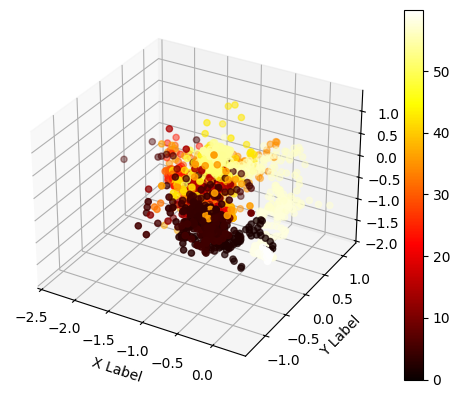

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

img = ax.scatter(dataset['x'], dataset['y'], dataset['z'], c = dataset['time'], cmap = plt.hot())
fig.colorbar(img)
plt.show()

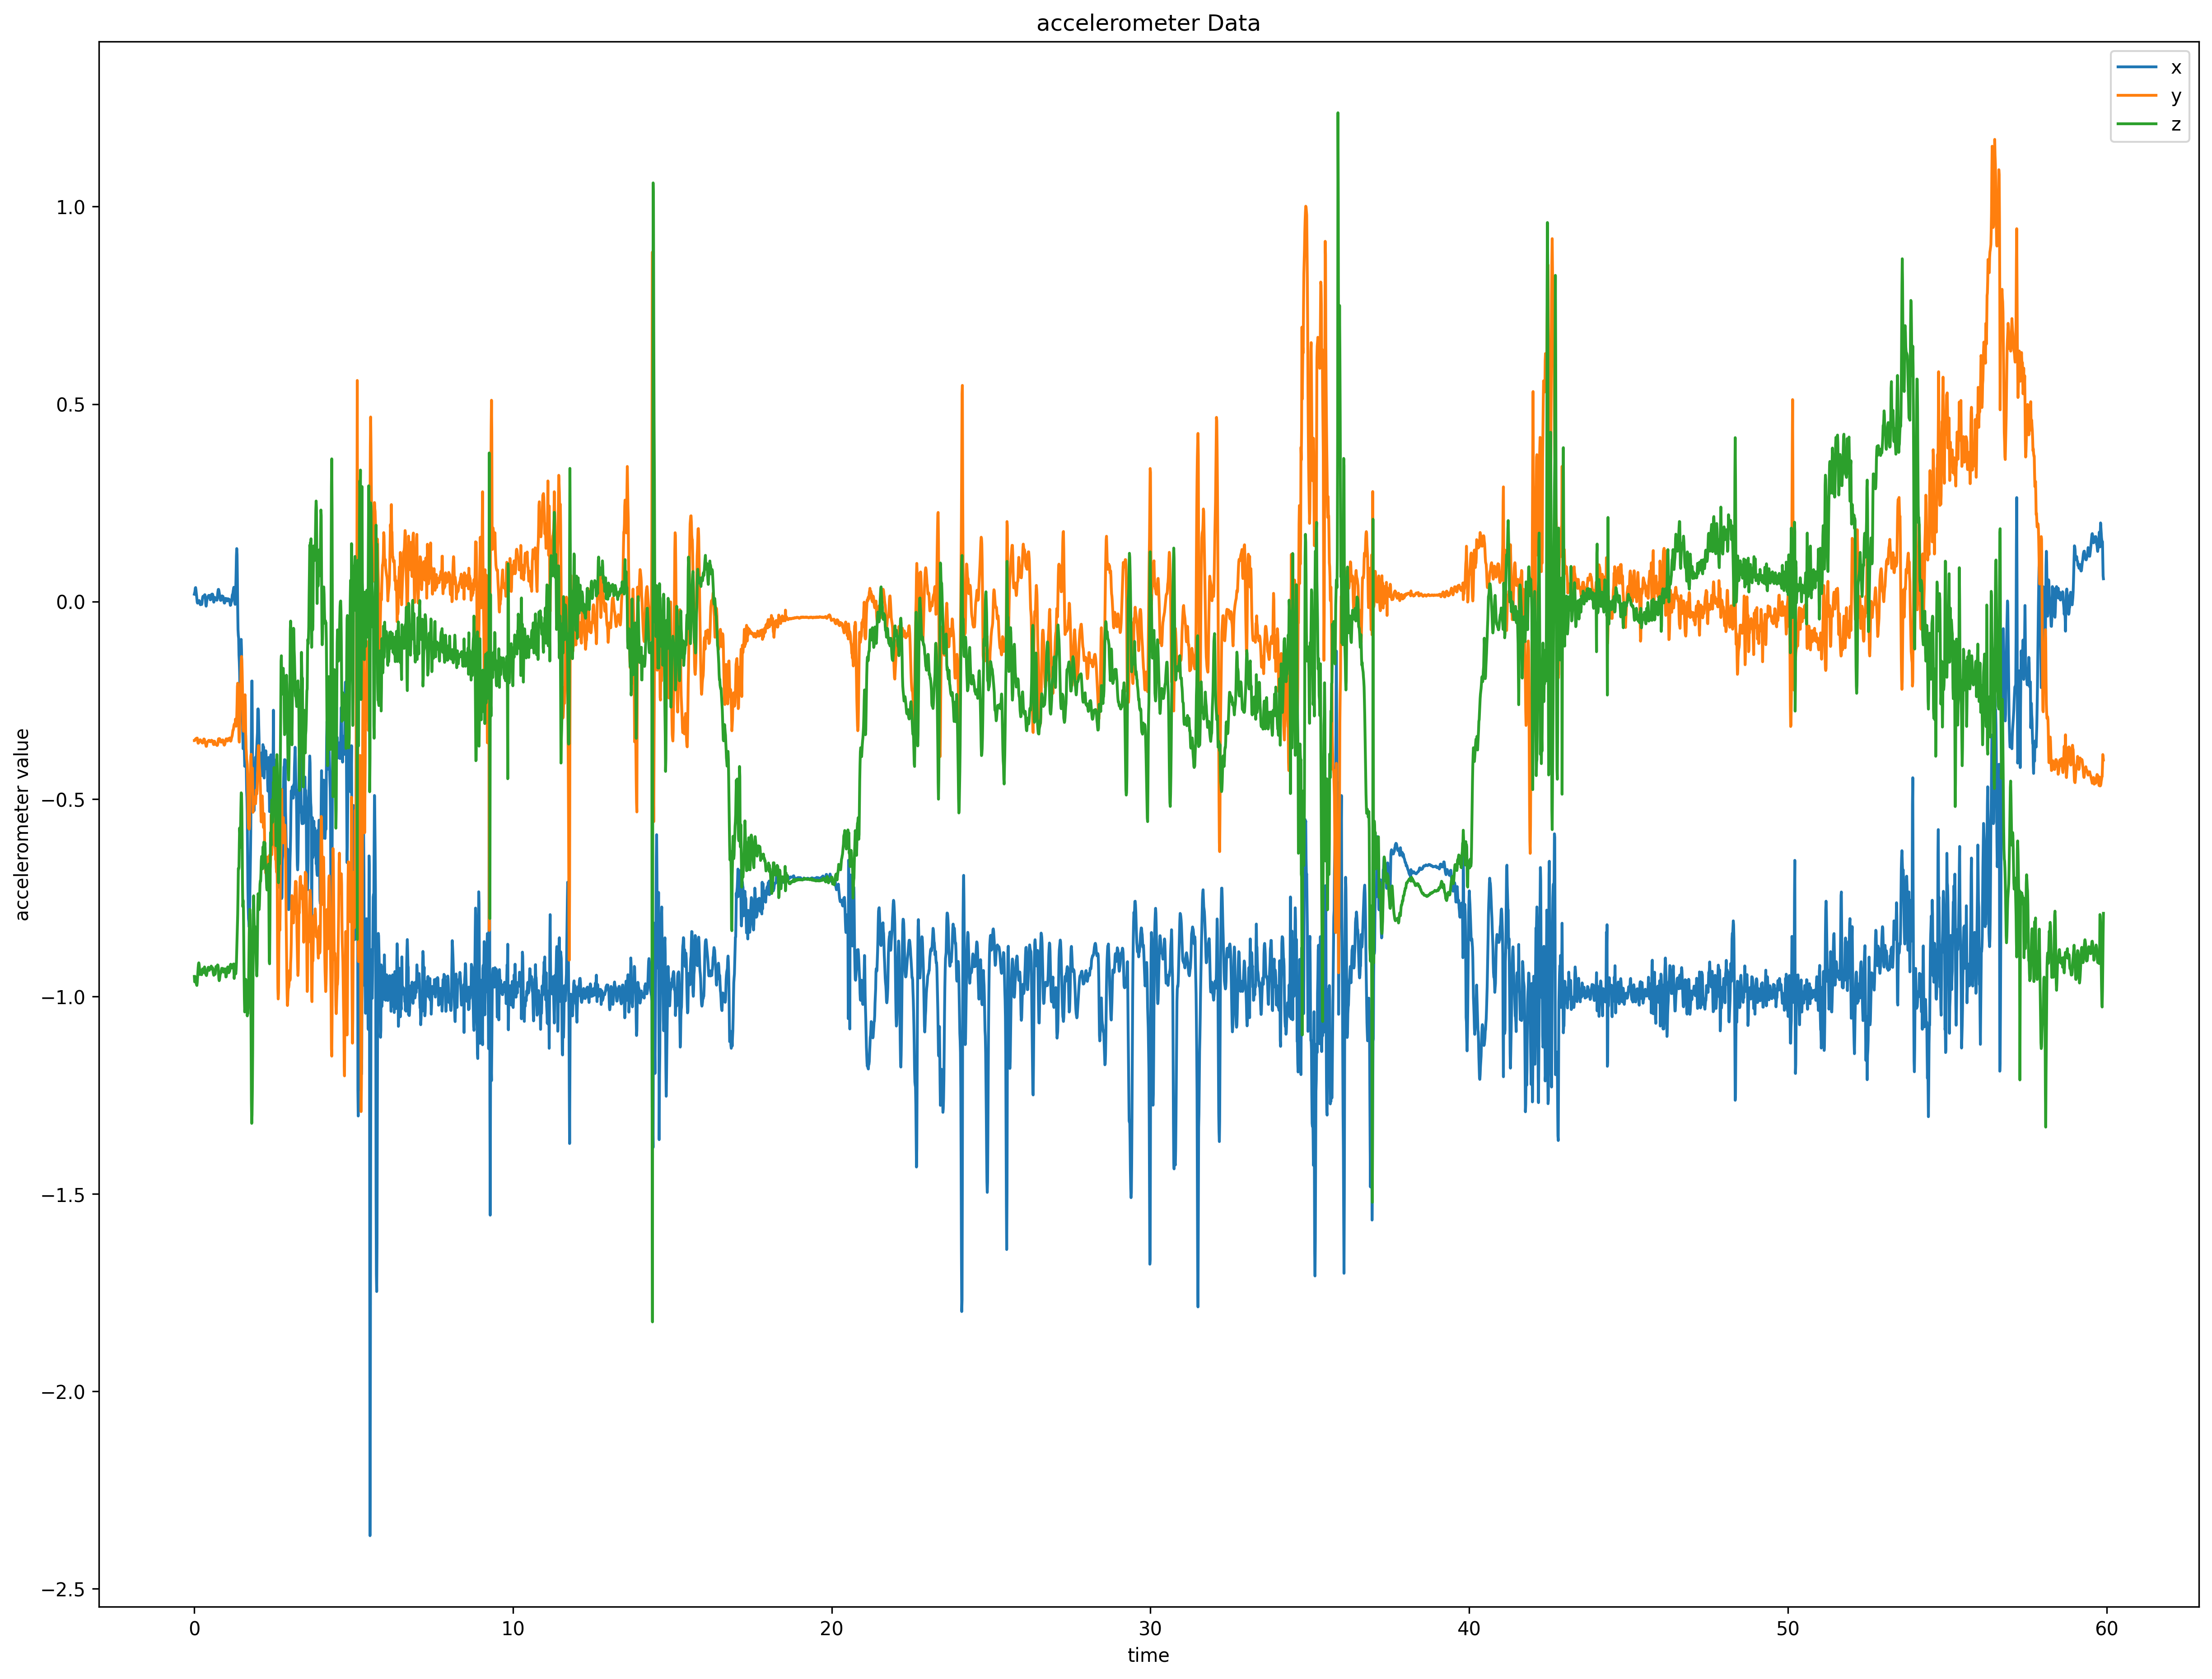

In [7]:
from matplotlib.pyplot import figure

figure(figsize=(20, 15), dpi=300)

plt.plot(dataset['time'], dataset['x'], label='x')
plt.plot(dataset['time'], dataset['y'], label='y')
plt.plot(dataset['time'], dataset['z'], label='z')

plt.xlabel("time")
plt.ylabel("accelerometer value")
plt.title("accelerometer Data")

plt.legend()
plt.show()


## Biomedical Signal Processing and Control Dataset [18]

## MHEALTH Dataset [1]
* 24 columns of data
* Column 1: acceleration from the chest sensor (X axis)
* Column 2: acceleration from the chest sensor (Y axis)
* Column 3: acceleration from the chest sensor (Z axis)
* Column 4: electrocardiogram signal (lead 1) 
* Column 5: electrocardiogram signal (lead 2)
* Column 6: acceleration from the left-ankle sensor (X axis)
* Column 7: acceleration from the left-ankle sensor (Y axis)
* Column 8: acceleration from the left-ankle sensor (Z axis)
* Column 9: gyro from the left-ankle sensor (X axis)
* Column 10: gyro from the left-ankle sensor (Y axis)
* Column 11: gyro from the left-ankle sensor (Z axis)
* Column 13: magnetometer from the left-ankle sensor (X axis)
* Column 13: magnetometer from the left-ankle sensor (Y axis)
* Column 14: magnetometer from the left-ankle sensor (Z axis)
* Column 15: acceleration from the right-lower-arm sensor (X axis)
* Column 16: acceleration from the right-lower-arm sensor (Y axis)
* Column 17: acceleration from the right-lower-arm sensor (Z axis)
* Column 18: gyro from the right-lower-arm sensor (X axis)
* Column 19: gyro from the right-lower-arm sensor (Y axis)
* Column 20: gyro from the right-lower-arm sensor (Z axis)
* Column 21: magnetometer from the right-lower-arm sensor (X axis)
* Column 22: magnetometer from the right-lower-arm sensor (Y axis)
* Column 23: magnetometer from the right-lower-arm sensor (Z axis)
* Column 24: Label (0 for the null class)


In [18]:
path = "/home/jm/vscode/Python/pytorch/Fall Dectection/MHEALTHDATASET"

os.chdir(path)

mhealth_data = np.array([], dtype=np.float32)

#gets data from file specified by file_path
def get_contents(file_path):
    global mhealth_data
    
    #chest sensor
    chest_x_accel = []
    chest_y_accel = []
    chest_z_accel = []
    
    #electrocardiogram signals
    ecs1 = []
    ecs2 = []
    
    #lower left ankle acceleration data
    l_ankle_x_accel = []
    l_ankle_y_accel = []
    l_ankle_z_accel = []
    
    #left ankle gyro data
    l_ankle_x_g = []
    l_ankle_y_g= []
    l_ankle_z_g = []
    
    #magnetometer from left-ankle
    l_ankle_x_mag = []
    l_ankle_y_mag = []
    l_ankle_z_mag = []
    
    #right lower arm accerleration data
    r_arm_x_accel = []
    r_arm_y_accel = []
    r_arm_z_accel = []

    #right lower arm gyro data
    r_arm_x_g = []
    r_arm_y_g = []
    r_arm_z_g = []
    
    #right lower arm magnetometer
    r_arm_x_mag = []
    r_arm_y_mag = []
    r_arm_z_mag = []

    with open(file_path,'r') as file:

        # lines = file.readlines()[:]

        for line in file:
            data = line.split()
            
            #chest sensor
            chest_x_accel = np.append(chest_x_accel, np.float32(data[0]))
            chest_y_accel = np.append(chest_y_accel, np.float32(data[1]))
            chest_z_accel = np.append(chest_z_accel, np.float32(data[2]))

            #electrocardiogram signals
            ecs1 = np.append(ecs1, np.float32(data[3]))
            ecs2 = np.append(ecs2, np.float32(data[4]))
            
            #lower left ankle acceleration data
            l_ankle_x_accel = np.append(l_ankle_x_accel, np.float32(data[5]))
            l_ankle_y_accel = np.append(l_ankle_y_accel, np.float32(data[6]))
            l_ankle_z_accel = np.append(l_ankle_z_accel, np.float32(data[7]))
            
            #left ankle gyro data
            l_ankle_x_g = np.append(l_ankle_x_g, np.float32(data[8]))
            l_ankle_y_g = np.append(l_ankle_y_g, np.float32(data[9]))
            l_ankle_z_g = np.append(l_ankle_z_g, np.float32(data[10]))
            
            #magnetometer from left-ankle
            l_ankle_x_mag = np.append(l_ankle_x_mag, np.float32(data[11]))
            l_ankle_y_mag = np.append(l_ankle_y_mag, np.float32(data[12]))
            l_ankle_z_mag = np.append(l_ankle_z_mag, np.float32(data[13]))
            
            #right lower arm acceleration data
            r_arm_x_accel = np.append(r_arm_x_accel, np.float32(data[14]))
            r_arm_y_accel = np.append(r_arm_y_accel, np.float32(data[15]))
            r_arm_z_accel = np.append(r_arm_z_accel, np.float32(data[16]))
            
            #right lower arm gyro
            r_arm_x_g = np.append(r_arm_x_g, np.float32(data[17]))
            r_arm_y_g = np.append(r_arm_y_g, np.float32(data[18]))
            r_arm_z_g = np.append(r_arm_z_g, np.float32(data[19]))
            
            #right  lower arm magnetometer
            r_arm_x_mag = np.append(r_arm_x_mag, np.float32(data[20]))
            r_arm_y_mag = np.append(r_arm_y_mag, np.float32(data[21]))
            r_arm_z_mag = np.append(r_arm_z_mag, np.float32(data[22]))
            
            
    df = pd.DataFrame({
        'chest accerlation X-axis': chest_x_accel,
        'chest accerlation Y-axis': chest_y_accel,
        'chest accerlation Z-axis': chest_z_accel,
        'electrocardiogram signal 1': ecs1,
        'electrocardiogram signal 2': ecs2,
        'lower left ankle acceleration X-axis': l_ankle_x_accel,
        'lower left ankle accerlations Y-axis': l_ankle_y_accel,
        'lower left ankle accerlation Z-axis': l_ankle_z_accel,
        'lower left ankle gyro X-axis': l_ankle_x_g, 
        'lower left ankle gyro Y-axis': l_ankle_y_g,
        'lower left ankle gyro Z-axis': l_ankle_z_g,
        'lower left ankle magnetometer X-axis': l_ankle_x_mag,
        'lower left ankle magnetometer Y-axis': l_ankle_y_mag,
        'lower left ankle magnetometer Z-axis': l_ankle_y_mag,
        'lower right arm accerleration X-axis': r_arm_x_accel,
        'lower right arm accerleration Y-axis': r_arm_y_accel,
        'lower right arm accerleration Z-axis': r_arm_z_accel,
        'lower right arm gryo X-axis': r_arm_x_g,
        'lower right arm gryo Y-axis': r_arm_y_g,
        'lower right arm gryo Z-axis': r_arm_z_g,
        'lower right arm magnetometer X-axis': r_arm_x_mag,
        'lower right arm magnetometer Y-axis': r_arm_y_mag,
        'lower right arm magnetometer Z-axis': r_arm_z_mag,
    })
            
    return df

In [19]:
#go through all files in directory and extract data from txt files
for file in os.listdir():
    if file.endswith(".log"):
        file_path = f"{path}/{file}"

        print(f"Currently working on: {file_path}")
        get_contents(file_path)
        
mhealth_data.dtype

Currently working on: /home/jm/vscode/Python/pytorch/Fall Dectection/MHEALTHDATASET/mHealth_subject1.log


KeyboardInterrupt: 